# Project: Image segmentation

## Overview

The goal in this mini-project is to create a tissue segmentation method, based on the techniques you have seen so far. This method should generalize well to different images. We will be using the same images as in the segmentation exercises.

Your assignment is to do a small investigation of what method or combination of methods is most suitable for doing this. In this investigation, you should explain the choices you are making, for example by referring to what you studied in class (references are not needed, but are a bonus), showing plots etc.

There isn't one correct answer for the project. Your reasoning should show the reader that you understand the methods you studied, how to apply them to tissue segmentation and interpret the results. Consider these two example answers:

- (Poor) "We tried all combinations of features, and features A and B gave the best error, therefore you should always use features A and B"
- (Good) "Based on the scatterplots, we saw that features A and B, and features B and C, provided a good separation of the classes. We created learning curves for these two combinations. For features A and B, the error was lower for all training sizes. We then used the classifier trained on 1000 samples to visualize the predicted mask next to the true mask. Here we can see that the classifier makes many errors for the skull pixels, because their appearance is similar to pixels inside the brain."

The rest of this document outlines a few steps you could use to get started. These questions are not compulsory to include in your project, but they will guide you to a minimal solution. Solutions which go beyond these questions are of course also welcome.

## Guided project work
### 1. Creating datasets
1. Create a dataset for all the images, but where the labels are based on a different task: white matter vs gray matter vs cerebrospinal fluid.
2. Implement the missing functionality in `extract_features`. The final result should extract 5-10 features that you tried in the exercises, or created yourself, for a particular subject and slice.
3. Examine the (already implemented, but you might need to modify the location of the images it loads) function `create_dataset` which extracts the features for a several subjects and/or slices, and creates the labels (either for the brain/not brain task, or the tissue classification task). Create one training dataset for the tissue classification task.
4. Use `scatter_all` to look at the features you have. You can also look at PCA or subsets of the features. What can you say about the features?
5. In principle any type of processing you can apply to the image can be used to create more features. For example, if you enhance edges in the image, you can create a feature that provides information about whether that pixel is part of an edge or not. Think about the image processing techniques you learnt about in **8DB00** and invent a new feature to add to your dataset. Implement it in a new function, for example `extract_myfeature` that has the image as input, and the feature vector as output.
    
    You should aim for your feature to be different (not perfectly correlated) from the ones you already have. Note that you cannot use the ground-truth image to create features - you want to be able to extract the feature, even if ground truth is not available.
    
    Your answer should include a description of the feature, the code to extract it, and a demonstration that shows it is different from the features you already have.

(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]]), ('T1 intensity', 'T2 intensity', 'T1 blurred intensity', 'T2 blurred intensity', 'T1 minimum filter', 'T2 minimum filter', 'T1 maximum filter', 'T2 maximum filter', 'T1 gaussian gradient magnitude filter', 'T2 gaussian gradient magnitude filter', 'T1 gaussian la place filter', 'T2 gaussian la place filter', 'T1 median filter', 'T2 median filter', 'T1 sobel filter', 'T2 sobel filter', 'T1 rank filter', 'T2 rank filter', 'T1 prewitt filter', 'T2 prewitt filter'))


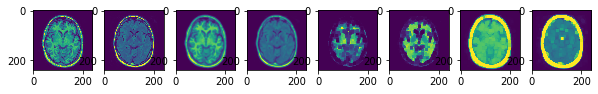

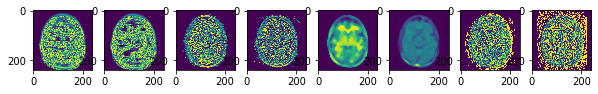

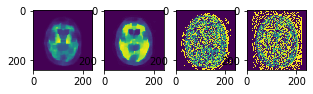

In [1]:
#Create a dataset for all the images, 
#but where the labels are based on a different task: 
#white matter vs gray matter vs cerebrospinal fluid.
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_util import create_labels
image_number=1 
slice_number=1 
task='brain'
create_labels(image_number, slice_number, task)

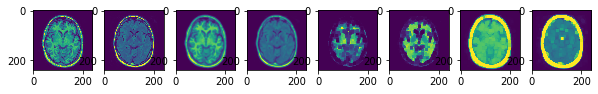

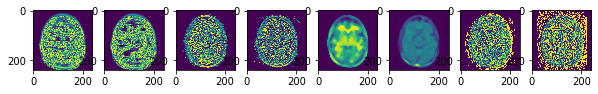

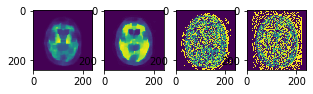

In [1]:
#Implement the missing functionality in extract_features. 
#The final result should extract 5-10 features that 
#you tried in the exercises, or created yourself, for a particular subject and slice.
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_util import extract_features
image_number=1 
slice_number=1 
extract_features(image_number, slice_number)

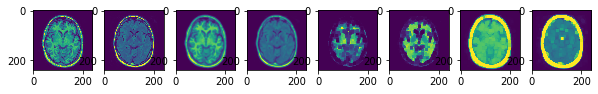

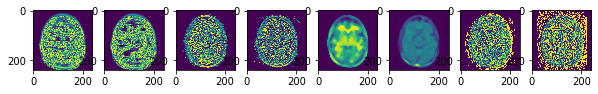

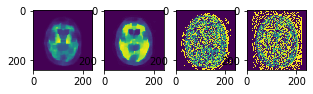

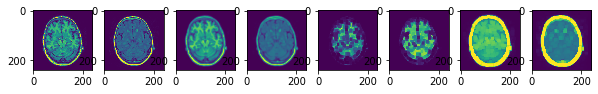

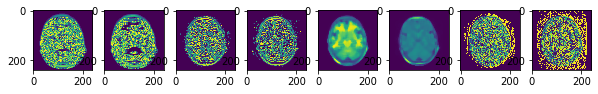

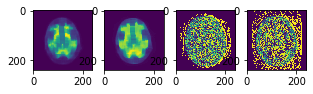

In [2]:
#Examine the (already implemented, but you might need to modify the
#location of the images it loads) function create_dataset which extracts 
#the features for a several subjects and/or slices, and creates the labels
#(either for the brain/not brain task, or the tissue classification task). 

%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_util import create_dataset
image_number=1 
slice_number=1 
task = 'brain'
create_dataset(image_number, slice_number, task)

#Create one training dataset for the tissue classification task.
train_data = create_dataset(3, 1, 'tissue')

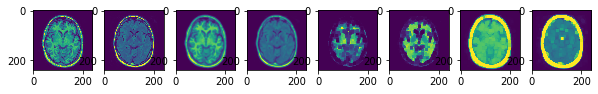

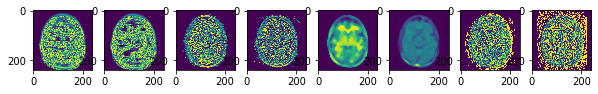

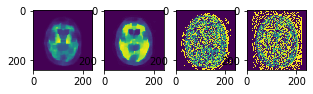

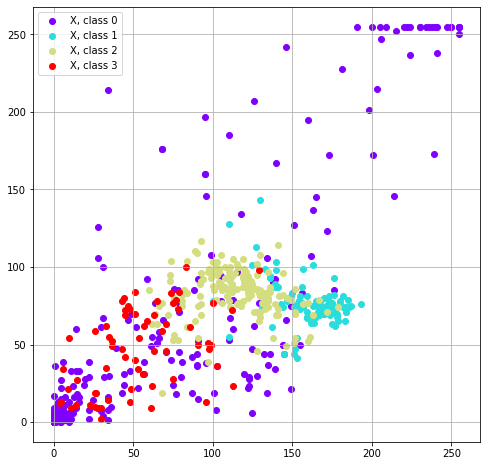

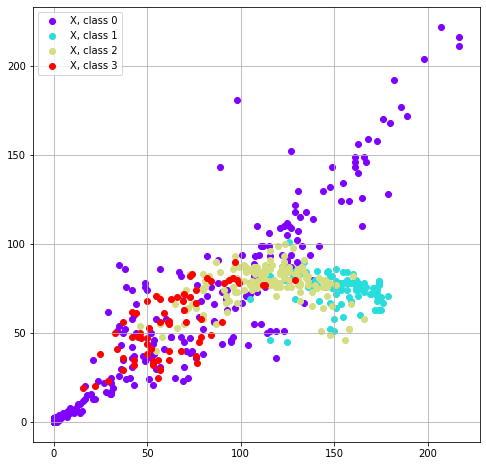

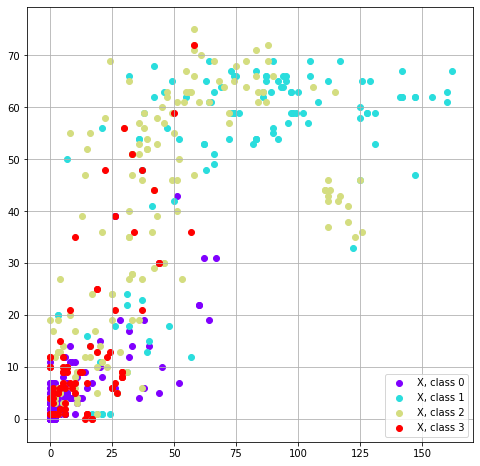

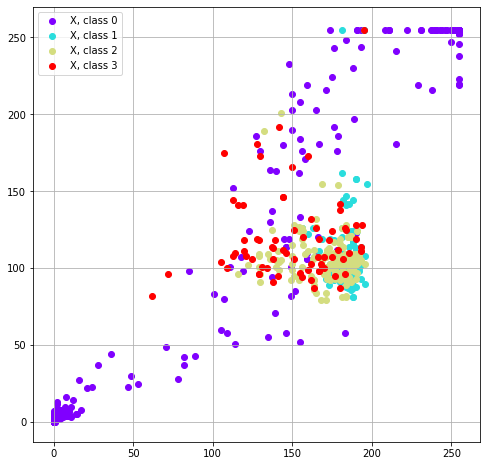

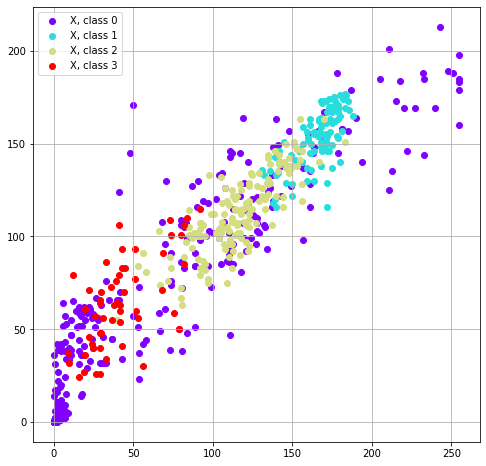

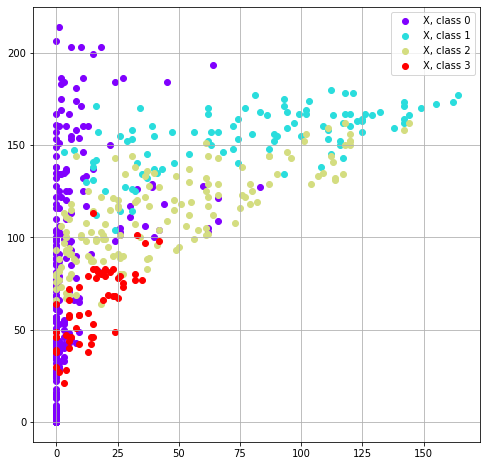

In [39]:
#Use scatter_all to look at the features you have. 
#You can also look at PCA or subsets of the features. 
#What can you say about the features?
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_util import scatter_data, extract_features, create_labels

image_number=1 
slice_number=1 
task = 'brain'

#Extract features from the subject/slice
X, feature_labels = extract_features(image_number, slice_number)

#Create labels
Y = create_labels(image_number, slice_number, task)


#intensiteit 0-1 => t1 intensity - t2 intensity
scatter_data(X, Y, feature0=0, feature1=1, ax=None)

#blurred 2-3 => t1 blurred - t2 blurred
scatter_data(X, Y, feature0=2, feature1=3, ax=None)

#minimum 4-5 => t1 min - t2 min
scatter_data(X, Y, feature0=4, feature1=5, ax=None)

#maximum 6-7 => t1 min - t2 min
scatter_data(X, Y, feature0=6, feature1=7, ax=None)


#intensiteit-blurred 0-2 => t1 intensity - t1 blurred
scatter_data(X, Y, feature0=0, feature1=2, ax=None)

#minimum-blurred 4-2 => t1 minimum - t1 blurred
scatter_data(X, Y, feature0=4, feature1=2, ax=None)

### 2. Model selection and generalization

1. Use the `create_dataset` function to create a training set and a test set for the tissue segmentation task. Use the same slice, but different subjects for training and testing.
2. Use these datasets to investigate using different features and different segmentation methods. You can use both classification error and dice overlap for evaluation, but since now there are four different classes (three tissues and background, you will need to use `dice_multiclass`.
    
    How do you decide what good choices are?  Document this process in a function you create yourself, which returns the best choices given two different subjects.
4. Repeat the above, but use a different subject for testing. Do your conclusions change or stay the same, why? What if you vary the slices? 

KeyboardInterrupt: 

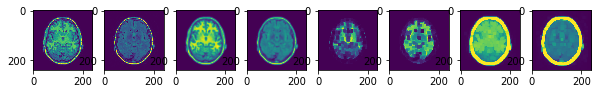

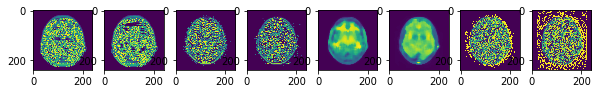

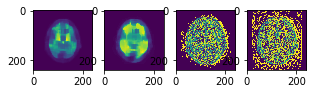

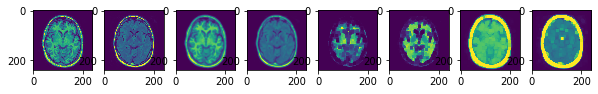

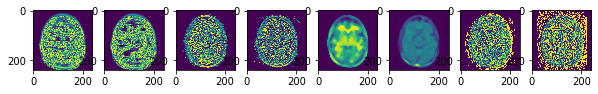

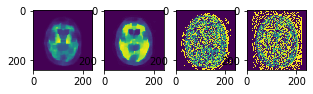

In [1]:
#Use the create_dataset function to create a training set and a test set for
#the tissue segmentation task. Use the same slice, 
#but different subjects for training and testing.
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_util import create_dataset #, dice_multiclass, classification_error
from segmentation_project import segmentation_mymethod
import segmentation_util as util
import matplotlib.pyplot as plt
import numpy as np
#from segmentation import kmeans_clustering, nn_classifier, knn_classifier, segmentation_atlas

#traindata
image_number=2
slice_number=1
task='brain'
train_data, train_labels, feature_labels_train = create_dataset(image_number, slice_number, task)

#testdata
image_number=1
slice_number=1
task='brain'
test_data, test_labels, feature_labels_test = create_dataset(image_number, slice_number, task)

#Use these datasets to investigate using different features and different 
#segmentation methods. You can use both classification error and dice overlap
#for evaluation, but since now there are four different classes 
#(three tissues and background, you will need to use dice_multiclass.
segmentation_mymethod(train_data, train_labels, test_data, test_labels, task ='brain', method = 'kmeans')


#dice_score_mean = dice_multiclass(true_labels=Y_train, predicted_labels=Y_test)
#print("Dice score mean: ",dice_score_mean)
#err = classification_error(true_labels=Y_train, predicted_labels=Y_test)
#print("Error: ", err)

#How do you decide what good choices are? 
#Document this process in a function you create yourself, 
#which returns the best choices given two different subjects.
 

uint8
uint8
uint8
uint8
Dice score mean:  0.5008246797167561
Error:  0.21994791666666666


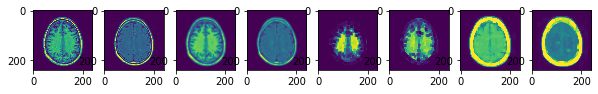

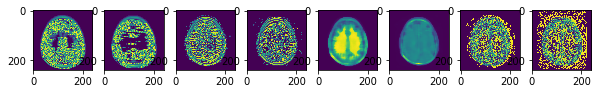

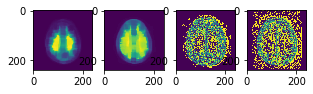

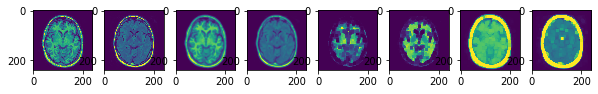

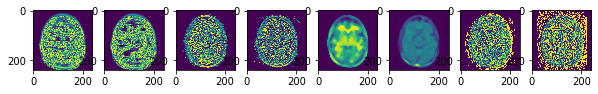

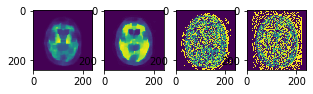

In [21]:
#Repeat the above, but use a different subject for testing. 
#Do your conclusions change or stay the same, why? 
#What if you vary the slices?

%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_util import create_dataset,dice_multiclass, classification_error

#traindata
image_number=1
slice_number=3
task='brain'
X_train, Y_train, feature_labels_train = create_dataset(image_number, slice_number, task)

#testdata
image_number=1
slice_number=1
task='brain'
X_test, Y_test, feature_labels_test = create_dataset(image_number, slice_number, task)

dice_score_mean = dice_multiclass(true_labels=Y_train, predicted_labels=Y_test)
print("Dice score mean: ",dice_score_mean)
err = classification_error(true_labels=Y_train, predicted_labels=Y_test)
print("Error: ", err)

#subjects varieren; image_number train_data - image_number test_data met slicenummer = 1
# 1-2:  Dice score mean:  0.5571990830837004
#       Error:  0.1990625
# 1-3: Dice score mean:  0.47849516052813384
#      Error:  0.23852430555555557
# 2-1: Dice score mean:  0.5571990830837004
#      Error:  0.1990625
# 2-4: Dice score mean:  0.5129465716963425
#      Error:  0.22319444444444445
# 3-1: Dice score mean:  0.47849516052813384
#      Error:  0.23852430555555557
# 3-2: Dice score mean:  0.5254053077822041
#      Error:  0.1971527777777778


#slices varieren; slice_number train_data - slice_number test_data met image_number=1
# 1-2: Dice score mean:  0.553267324391108
#      Error:  0.19949652777777777
# 1-3: Dice score mean:  0.5008246797167561
#      Error:  0.21994791666666666
# 2-1: Dice score mean:  0.553267324391108
#      Error:  0.19949652777777777
# 2-3: Dice score mean:  0.5272676065450674
#      Error:  0.20019097222222224
# 3-1: Dice score mean:  0.5008246797167561
#      Error:  0.21994791666666666
# 3-2: Dice score mean:  0.5272676065450674
#      Error:  0.20019097222222224

### 3. Combining different methods

1. Try the functions `segmentation_combined_atlas` and `segmentation_combined_knn` on the tissue segmentation task (do not forget to use majority voting for combining the labels). What are the strengths and weaknesses of each method?
2. Design a method that combines what you have learnt so far in `segmentation_mymethod`. Provide a motivation (based on what you know about the methods) of the choices that you made.
3. The script `segmentation_demo`, creates the results for several methods. This code is a bit slow, so it is not recommended to run it multiple times. (Also, you should not use all of these results to improve your method, since that means you are using the test data as the training data :) ). 
4. Run the script and look at the results. How does your method compare to the individual results? It is not required here that your method is always better! For example, you could select a subject where your method is the best, and a subject where your method is the worst, and explain what is happening in the images.
5. Discuss what other (combinations) methods could be suitable or not suitable for the task and why.

Loading data for 5 subjects...


../code\segmentation_util.py:287: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2 = plt.figure(figsize=(10,10))
../code\segmentation_project.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,5))


Finished loading data.
Starting segmentation...


NameError: name 'predicted_labels' is not defined

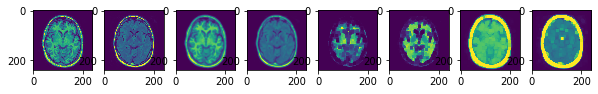

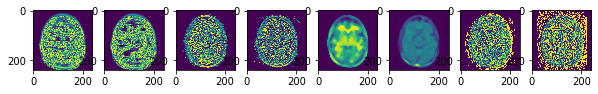

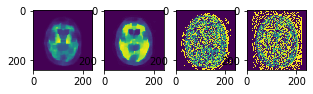

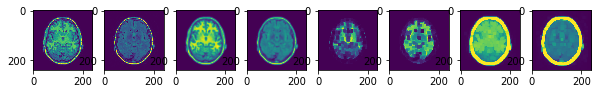

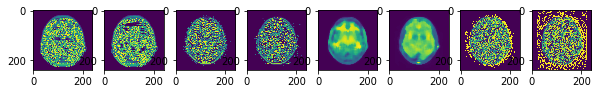

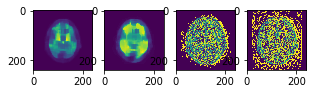

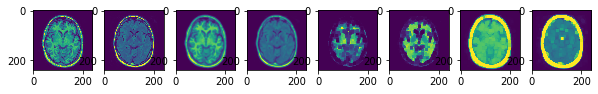

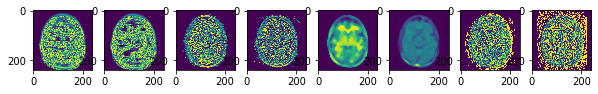

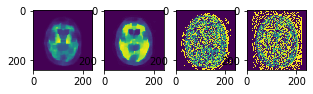

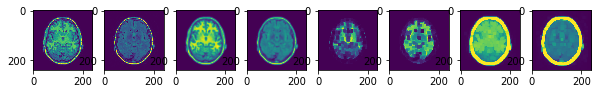

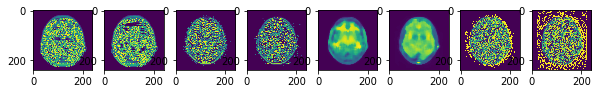

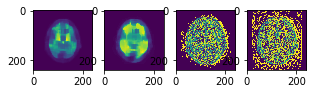

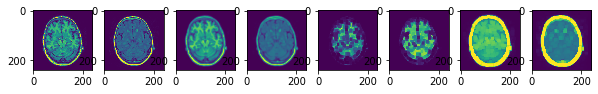

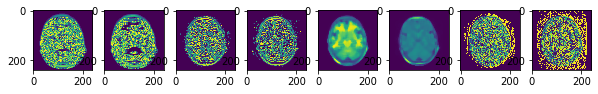

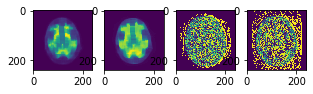

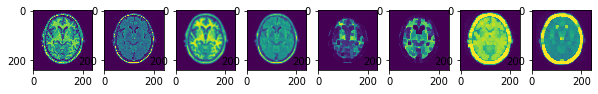

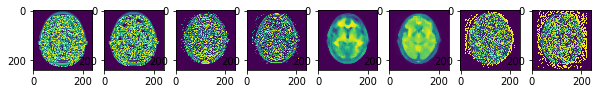

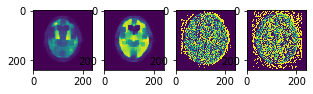

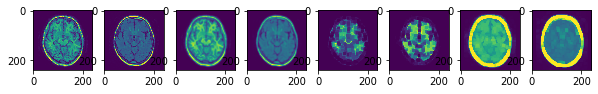

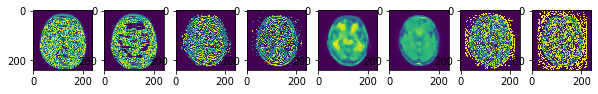

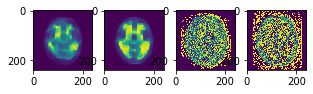

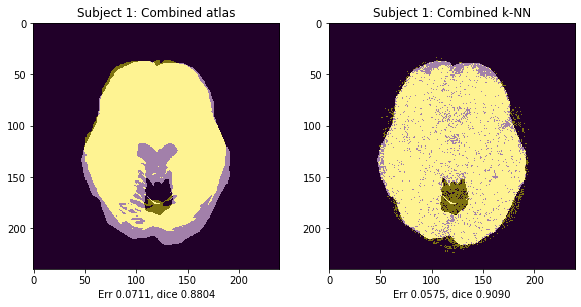

In [3]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_project import segmentation_demo
segmentation_demo()